In [1]:
#Exercise 1

In [144]:
import requests
from tqdm import tqdm
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED
from plotnine import *
import numpy as np

In [132]:
def get_error(a=0.001,b=0.001):
    return float(requests.get(f"http://ramcdougal.com/cgi-bin/error_function.py?a={a}&b={b}", headers={"User-Agent": "MyScript"}).text)

In [133]:
def optimal_a_b(a,b):
    h=1e-10
    scalar=0.1
    stop=1e-5
    new_a=a-scalar*((get_error(a+h,b)-get_error(a,b))/h)
    new_b=b-scalar*((get_error(a,b+h)-get_error(a,b))/h)
    while abs(get_error(new_a,new_b)-get_error(a,b))>stop:
        a,b=new_a,new_b
        new_a,new_b=new_a-scalar*((get_error(a+h,b)-get_error(a,b))/h),new_b-scalar*((get_error(a,b+h)-get_error(a,b))/h)
    return new_a,new_b

In [134]:
optimal_a_b(a=0.2,b=0.3)

(0.21000000082740372, 0.6600000297865336)

In [146]:
error_list=[]
for a in [0.1,0.5,0.9]:
    for b in [0.1,0.5,0.9]:
        val=optimal_a_b(a,b)
        error_list.append(val)

In [147]:
error_lst=[]
for pair in error_list:
    error_lst.append(get_error(a=pair[0],b=pair[1]))

In [148]:
error_lst

[1.1008769972,
 1.10219699864,
 1.10037699937,
 1.00025499952,
 1.10055699884,
 1.10019699934,
 1.00019499932,
 1.00055499754,
 1.10205699498]

In [149]:
data=pd.DataFrame(error_lst)

In [152]:
plot=(ggplot(pd.DataFrame({'x':np.linspace(0,5,len(error_list)),'error':error_lst}), aes(x='x', y='error'))
 +geom_point())

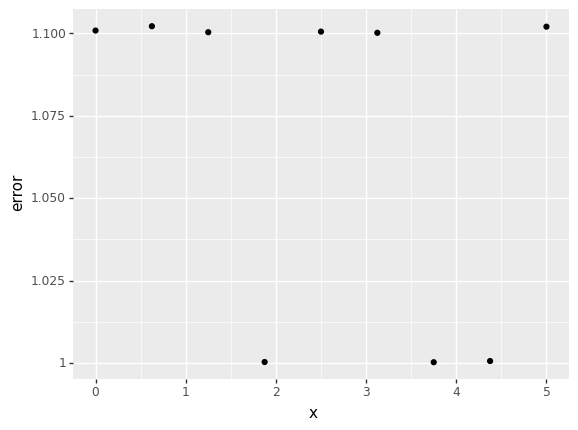

<ggplot: (8774897292638)>

In [153]:
plot